### Building a Linear Model with Autograd

#Building a Simple Linear Model with one single neuron and no activation function, and use AutoGrad package to train neural network weights
X_train has features to train the model and Y train corresponds to target values.

In [40]:
# Importing Packages
import torch
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Setting up X train and Y_train 

x_train = np.array([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816],
                    [8.9], [5.2], [8.59], [2.1], [8],
                    [10], [4.5], [6], [4]],
                   dtype = np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.41], [2.4], [3.357],
                    [2.6], [1.96], [3.53], [1.76], [3.2],
                    [3.5], [1.6], [2.5], [2.2]],
                   dtype = np.float32)


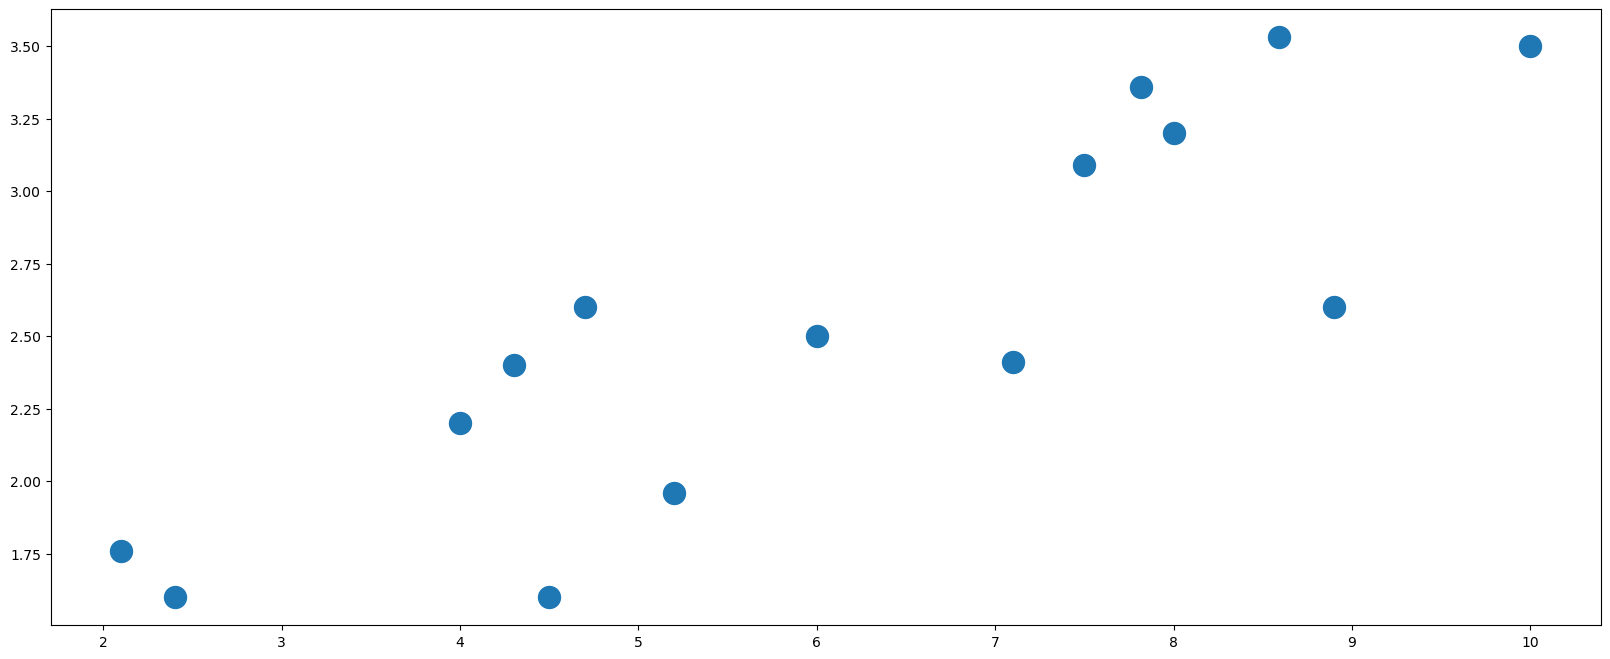

In [44]:
# Analyzing relationships between X and Y with scatter plot

plt.figure(figsize=(20,8))
plt.scatter(x_train, y_train, s=250)
plt.show()

there is some linear relationship between X and Y

In [47]:
# converting numpy arrays to tensors

X_train= torch.tensor(x_train)
X_train

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [49]:
Y_train= torch.from_numpy(y_train)
Y_train

tensor([[2.6000],
        [1.6000],
        [3.0900],
        [2.4100],
        [2.4000],
        [3.3570],
        [2.6000],
        [1.9600],
        [3.5300],
        [1.7600],
        [3.2000],
        [3.5000],
        [1.6000],
        [2.5000],
        [2.2000]])

In [51]:

print("requires grad for X_train:", X_train.requires_grad)
print("requires grad for Y_train:", Y_train.requires_grad)

requires grad for X_train: False
requires grad for Y_train: False


#setting up our simple neural network with one input X, one hidden layer with one neuron and one output variable
we are not using pytorch built-in layers , but constructing one manually with tensors

In [54]:

input=1
hidden=1
output=1

#Model Parameters:
w1 contains weights for our input network,w2 corresponds to weights between hidden-layer and output-layer; 
 w1 and w2 will be trained using autograd

In [57]:
# W1 contains weights for our input network 

w1= torch.rand(input, hidden, requires_grad=True)
w1.shape

torch.Size([1, 1])

In [59]:
#w2 corresponds to weights between hidden-layer and output-layer

w2= torch.rand(hidden, output, requires_grad=True)
w2.shape

torch.Size([1, 1])

#Now we specify a design hyperparameter of out network which is learning rate. 
Learning rate determines the size of the step that model parameters take towards the optimum

In [62]:

learning_rate= 1e-6

#we will train the neural network for a number of iterations
for iter in range(1,4000):

    #first step is to make a Forward pass through the neura network inorder to get predicted values
    y_pred = torch.mm(torch.mm(X_train, w1), w2) #ForwardPass, no activation function, input*w1*w2

    #now we calculate Mean Square error loss for regression
    loss= (y_pred-Y_train).pow(2).sum() #loss function

    #for every 50 iterations we will print out the loss to check convergence
    if iter%50==0:
        print(iter, loss.item())  #value of loss for every 50 iteration to check convergence

    #now calculating gradients by performing backward pass
    loss.backward()  # to calculate gradients for model parameters
    
    #gradient vectors will now be available for tensors w1 and w2. 
    #gradients for w1 and w2 are calculated w.r.t Mean square error loss and stored in w1.grad and w2.grad
    
    #updating models weights. we dont need to enable tracking hence we use torch.no_grad() block
    with torch.no_grad(): 
        
        #the below gives new values of w1 and w2
        w1.data = w1 - learning_rate * w1.grad 
        w2.data = w2 - learning_rate * w2.grad
        
        # zero out existing gradients for next pass
        w1.grad.zero_() 
        w2.grad.zero_()
        
        
    
    

50 59.759765625
100 56.52159881591797
150 53.421756744384766
200 50.45597457885742
250 47.620445251464844
300 44.91176986694336
350 42.326812744140625
400 39.862613677978516
450 37.516395568847656
500 35.28536605834961
550 33.16677474975586
600 31.15789031982422
650 29.255802154541016
700 27.45762062072754
750 25.760379791259766
800 24.16097640991211
850 22.656217575073242
900 21.24283218383789
950 19.917465209960938
1000 18.676671981811523
1050 17.51697540283203
1100 16.434833526611328
1150 15.42673110961914
1200 14.489047050476074
1250 13.618268013000488
1300 12.810867309570312
1350 12.06335735321045
1400 11.372352600097656
1450 10.73449993133545
1500 10.146533966064453
1550 9.60532283782959
1600 9.107800483703613
1650 8.651042938232422
1700 8.232246398925781
1750 7.848712921142578
1800 7.49790620803833
1850 7.177384376525879
1900 6.88486385345459
1950 6.618190288543701
2000 6.375296592712402
2050 6.154311180114746
2100 5.953444004058838
2150 5.77101993560791
2200 5.605493068695068
2

In [18]:
print("w1: " , w1)
print("w2: " , w2)

w1:  tensor([[0.5415]], requires_grad=True)
w2:  tensor([[0.7044]], requires_grad=True)


In [19]:
x_train_tensor= torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [20]:
predicted_in_tensor= torch.mm(torch.mm(x_train_tensor, w1),w2)
predicted_in_tensor

tensor([[1.7929],
        [0.9155],
        [2.8610],
        [2.7084],
        [1.6403],
        [2.9816],
        [3.3951],
        [1.9836],
        [3.2768],
        [0.8011],
        [3.0517],
        [3.8147],
        [1.7166],
        [2.2888],
        [1.5259]], grad_fn=<MmBackward0>)

In [21]:
predicted= predicted_in_tensor.detach().numpy()
predicted

array([[1.7929007 ],
       [0.91552377],
       [2.8610117 ],
       [2.7084246 ],
       [1.6403135 ],
       [2.9815557 ],
       [3.395067  ],
       [1.9836347 ],
       [3.2768123 ],
       [0.80108327],
       [3.051746  ],
       [3.8146825 ],
       [1.716607  ],
       [2.2888093 ],
       [1.525873  ]], dtype=float32)

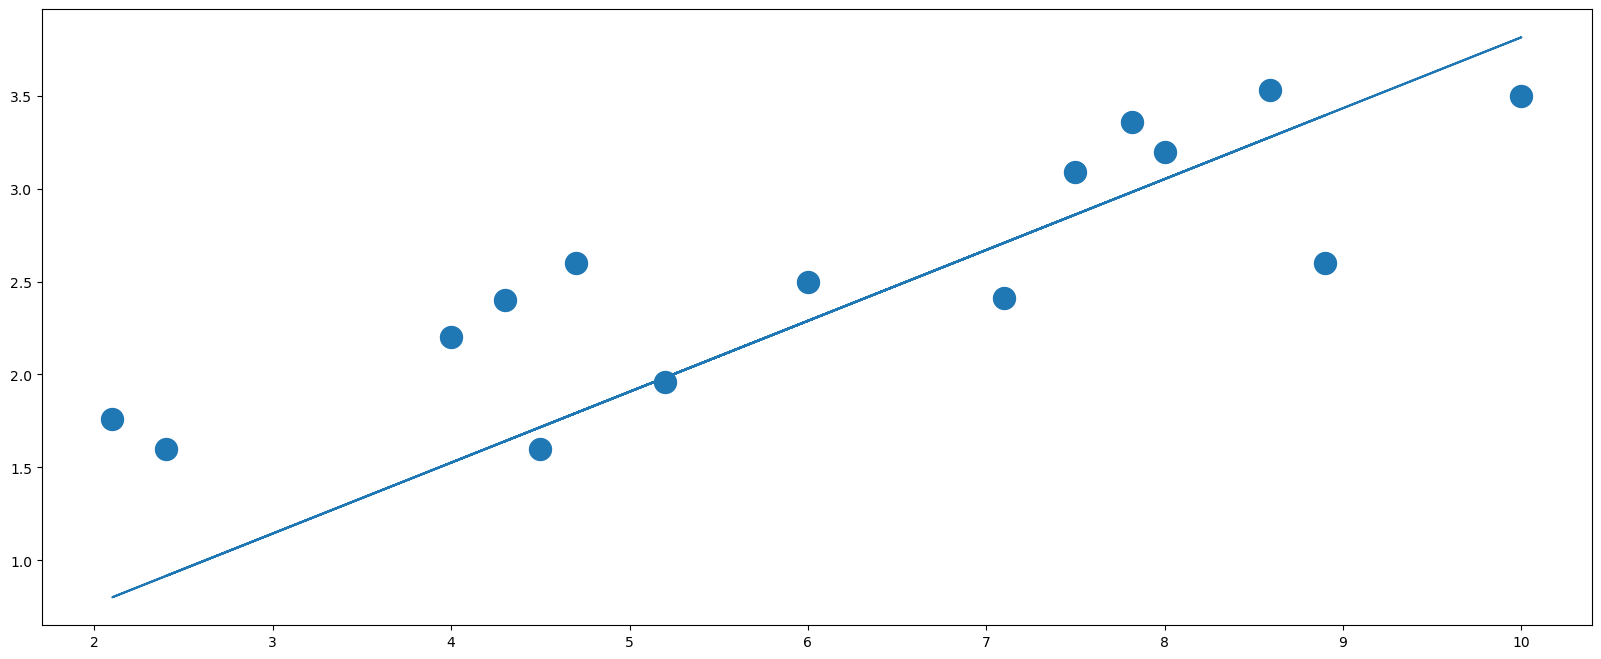

In [22]:
plt.figure(figsize=(20,8))
plt.scatter(x_train, y_train, s=250)

plt.plot(x_train, predicted)

plt.show()

#By increasing the number of iterations we train the network longer. The above graph shows that out model has done pretty well.